# Handwritten Digits Classifier
Dataset: MNIST

Model: LeNet-5
### References:
- [PyTorch Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- Official PyTorch Documentation

In [1]:
#Import libraries
import torch 
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim

# Preparing the data
In the MNIST dataset, each image has 1 channel (grayscale), is 28*28 pixels, and is accompanied with its target label.

The train set has 60,000 images and the test set has 10,000 images.

For other specifics, visit the [official website](http://yann.lecun.com/exdb/mnist/).

You don't have to worry about navigating this page directly, as PyTorch has pre-loaded datasets.

During the preprocessing, we resize to 32*32 px since the LeNet-5 architecture takes in images of those dimensions.

In [2]:
#Load the data
transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor(), transforms.Normalize((0.5), (0.5))]) 
#load train dataset:
trainset = torchvision.datasets.MNIST(root='~/.pytorch/MNIST_data/', train = True, download = True, transform = transform)  
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True, num_workers = 2, drop_last = True)
#load test dataset:
testset = torchvision.datasets.MNIST(root = '~/.pytorch/MNIST_data/', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle = False, num_workers=2, drop_last = True)

classes = ("Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine") #Just labels, for our own printing use

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



# Defining the model

In [3]:
#A class to encapsulate the network architecture
class Net(nn.Module): 
  def __init__(self): 
    super(Net, self).__init__() 
    self.conv1 = nn.Conv2d(1,6,5) 
    self.pool = nn.MaxPool2d(2,2) 
    self.conv2 = nn.Conv2d(6,16,5) 
    self.fc1 = nn.Linear(16*5*5,120) 
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x): 
    x = self.pool(F.relu(self.conv1(x))) 
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5) 
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x) #The softmax activation isn't done here as combining it with loss calculations will make it more computationally efficient. Hence, this will automatically be taken care of by the loss criterion that we chose later
    return x

net = Net()

#Loss function and Optimizer:
criterion = nn.CrossEntropyLoss() # This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

# Training the model
Loop over our data iterator, feeding the inputs to the network, and optimize.

In [4]:
x_minibatches=[] #x and y for plotting the training curve later
y_loss=[]
optimizer.zero_grad()
running_loss = 0.0
for epoch in range(3): 
  print("Epoch loss:", running_loss/1000) #The inner loop runs 15k times, where the loss is reset every 2000th minibatch. This leaves space for 1000 minibatches' loss to be recorded, as statistics for every epoch. 
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0): #i is also the no. of minibatches
     inputs, labels = data
     optimizer.zero_grad() 
     outputs = net(inputs) #Forward prop
     loss = criterion(outputs, labels) 
     loss.backward() #Backward prop
     optimizer.step()  #Optimizer finally updates the parameters
    
     #Record some statistics:
     running_loss += loss.item() 
     if i%2000 == 1999: #For every 2000 minibatches (or 8k images)
       print('[%d, %d] loss: %.3f' %(epoch+1, i+1, running_loss/2000)) 
       x_minibatches.append((i+1)*4+(epoch*60000))
       y_loss.append(running_loss/2000)
       running_loss = 0.0 #Reset the loss, so we know how the loss changes within a reasonable frame
print('Finished training')

#Demo: We save, and later load, our model:
PATH = './MNIST_net.pth' #By convention, PyTorch files have pt/pth extension
torch.save(net.state_dict(), PATH) #recommended to save state dict rather than module for compatibility

Epoch loss: 0.0
[1, 2000] loss: 1.114
[1, 4000] loss: 0.202
[1, 6000] loss: 0.145
[1, 8000] loss: 0.117
[1, 10000] loss: 0.105
[1, 12000] loss: 0.080
[1, 14000] loss: 0.078
Epoch loss: 0.07518585476835597
[2, 2000] loss: 0.067
[2, 4000] loss: 0.057
[2, 6000] loss: 0.057
[2, 8000] loss: 0.060
[2, 10000] loss: 0.061
[2, 12000] loss: 0.057
[2, 14000] loss: 0.051
Epoch loss: 0.05064896265518792
[3, 2000] loss: 0.040
[3, 4000] loss: 0.036
[3, 6000] loss: 0.042
[3, 8000] loss: 0.044
[3, 10000] loss: 0.047
[3, 12000] loss: 0.041
[3, 14000] loss: 0.037
Finished training


# Peeking into the trained model

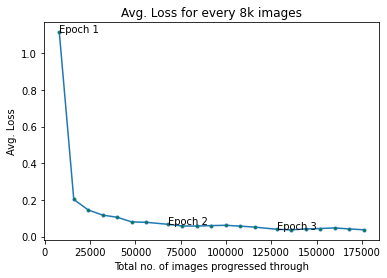

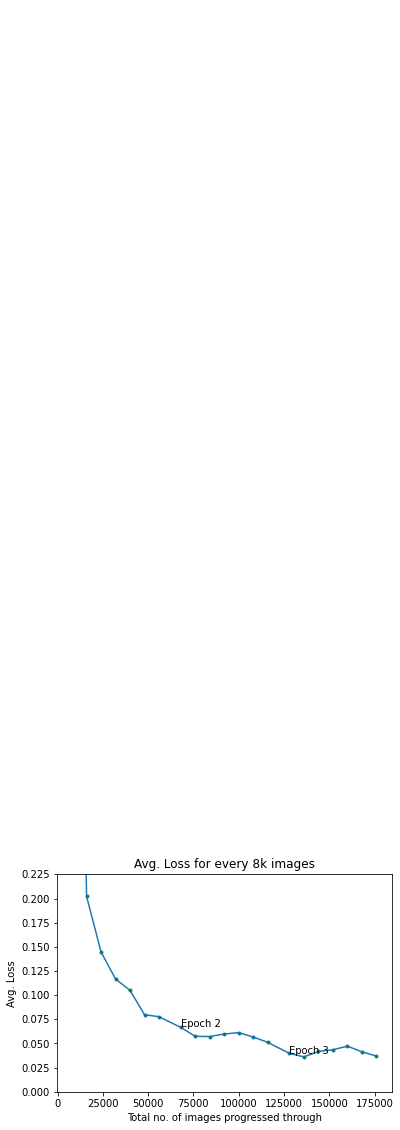

In [5]:
#Normal plot
plt.plot(x_minibatches, y_loss, marker='.', markerfacecolor='g')
for i in range(len(x_minibatches)):
    if i%7==0:
        plt.annotate("Epoch " + str(int(i/7)+1), (x_minibatches[i], y_loss[i]))
plt.xlabel("Total no. of images progressed through")
plt.ylabel("Avg. Loss")
plt.title('Avg. Loss for every 8k images')
plt.show()

#Zoom in, as the first point is the farthest away from others, making it impossible to see the actual progress in later epochs
plt.ylim(top=0.225)
plt.plot(x_minibatches, y_loss, marker='.', markerfacecolor='g')
for i in range(len(x_minibatches)):
    if i%7==0:
        plt.annotate("Epoch " + str(int(i/7)+1), (x_minibatches[i], y_loss[i]))
plt.xlabel("Total no. of images progressed through")
plt.ylabel("Avg. Loss")
plt.title('Avg. Loss for every 8k images')
plt.show()

## A live sample test of the trained model

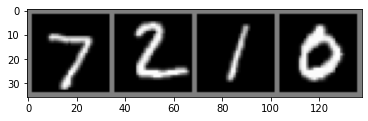

Target labels:  Seven   Two   One  Zero
Predicted labels:  Seven   Two   One  Zero


In [6]:
def imshow(img): #A function to plot image(s)
  #we first undo some of the preprocessing to see how the actual image is
  img = img/2 + 0.5 #un-normalize 
  npimg = img.numpy() #convert from Tensor back to numpy's ndarray (needed for the transpose() below)
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show() 

dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('Target labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

net = Net()
net.load_state_dict(torch.load(PATH)) 
outputs = net(images)
_, predicted = torch.max(outputs, 1) 
print('Predicted labels: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

# Testing the model
Putting the model through both the test and train sets to see how well it performs.

In [7]:
#Test set
correct = 0.0
total = 0.0
with torch.no_grad(): 
  for data in testloader: 
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1) 
    total+=labels.size(0) 
    correct += (predicted==labels).sum().item() 
print('Test set accuracy: %f %%' %(100.0*correct/total))

#Train set
correct = 0.0
total = 0.0
with torch.no_grad():
  for data in trainloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total+=labels.size(0) 
    correct += (predicted==labels).sum().item() 
print('Train set accuracy: %f %%' %(100.0*correct/total))

Test set accuracy: 98.740000 %
Train set accuracy: 99.078333 %
